# **GRIP: The Sparks Foundations**
## **Data Science and Business Analystics Intern**
### ***Author : Ajay Wankhede***
### **Task 2 : Prediction using Unsupervised ML**



### In this task of Iris datasets Predict the optimum number of clusters using K-means clustering and represent it visually.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Load data
Iris=pd.read_csv("Iris.csv")


In [3]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(Iris.shape)

(150, 6)


In [5]:
# droping Id column
Iris.drop(labels='Id',axis=1,inplace=True)


In [6]:
#Checking data types and any Null value are present or not.
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
x = Iris.iloc[:, [0, 1, 2, 3]].values

### Optimum number of clusters by K-means method

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

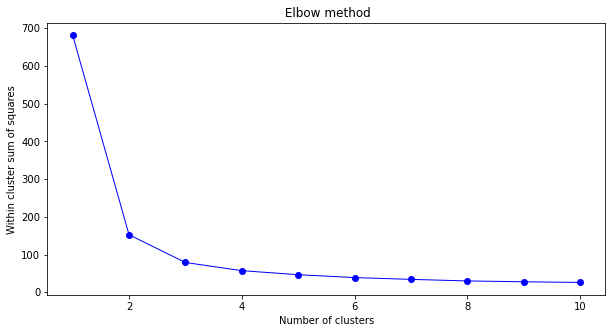

In [10]:
#Ploting the Elbow
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss,linewidth=1,color='blue',marker='o')
plt.title(' Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

From Elbow method, the optimum clusters is at where the elbow occurs. i.e optimum clusters is 3
where WCSS doesn't decrease significantly with every iterations.


In [14]:
#model Building and predicting
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
Iris['Cluster']= kmeans.fit_predict(x)

In [15]:
Iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [16]:
Iris.Cluster.value_counts()

0    62
1    50
2    38
Name: Cluster, dtype: int64

In [17]:
Iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

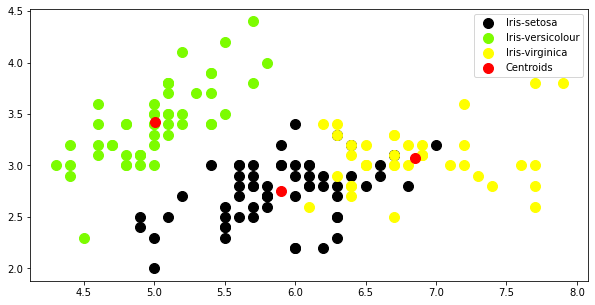

In [18]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(x[Iris['Cluster'] == 0, 0], x[Iris['Cluster'] == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[Iris['Cluster'] == 1, 0], x[Iris['Cluster'] == 1, 1], 
            s = 100, c = 'lawngreen', label = 'Iris-versicolour')
plt.scatter(x[Iris['Cluster'] == 2, 0], x[Iris['Cluster'] == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()